In [52]:
import sys
import os
from matplotlib import pyplot as plt

# Add the src directory to the Python path
sys.path.append(os.path.abspath(os.path.join('..')))
# Now you can import the TimeSeriesDataset class
from src.TimeSeriesDataset import TimeSeriesDataset as TSD

In [53]:
dataset_100yr = TSD(file_path='../datasets/100_yr_dataset.xlsx')
dataset_PT = TSD(file_path='../datasets/power_transitions.xlsx')

Dataset loaded from ../datasets/100_yr_dataset.xlsx
Dataset loaded from ../datasets/power_transitions.xlsx


In [54]:
# print(dataset_100yr.scv.PolityName.value_counts().head(20))
# print(dataset_PT.scv_imputed.PolityName.value_counts().head(20))
dataset_PT.scv_clean

,NGA,PolityID,PolityName,Year,Pop,Terr,Cap,Hierarchy,Government,Infrastructure,...,overturn,predecessor_assassination,intra_elite,military_revolt,popular_uprising,separatist_rebellion,external_invasion,external_interference,PC_1,PC_2
0,Middle Yellow River Valley,1,cn_qing_dyn_1,1652.5,8.124291,7.117271,5.865941,6.750000,0.727273,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.816633,3.812126
1,Middle Yellow River Valley,1,cn_qing_dyn_1,1691.5,8.124291,7.117271,5.865941,6.750000,0.727273,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,7.816633,3.812126
2,Middle Yellow River Valley,1,cn_qing_dyn_1,1728.5,8.124291,7.117271,5.865941,6.750000,0.727273,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.816633,3.812126
3,Middle Yellow River Valley,1,cn_qing_dyn_1,1765.5,8.124291,7.117271,5.865941,6.750000,0.727273,1.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,0.1,0.1,7.816633,3.812126
4,Middle Yellow River Valley,2,cn_qing_dyn_2,1808.0,8.469822,7.053078,5.949825,6.802614,0.909091,1.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.032653,3.760519
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1229,NaN,797,de_empire_1,1013.0,7.332438,6.000000,5.000000,5.500000,0.727273,0.583333,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,6.185770,3.480064
1230,NaN,797,de_empire_1,1031.5,7.332438,6.000000,5.000000,5.500000,0.727273,0.583333,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.185770,3.480064
1231,NaN,797,de_empire_1,1047.5,7.332438,6.000000,5.000000,5.500000,0.727273,0.583333,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,6.185770,3.480064
1232,NaN,797,de_empire_1,1081.0,7.332438,6.000000,5.000000,5.500000,0.727273,0.583333,...,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,6.185770,3.480064


(-5000.0, 2000.0)

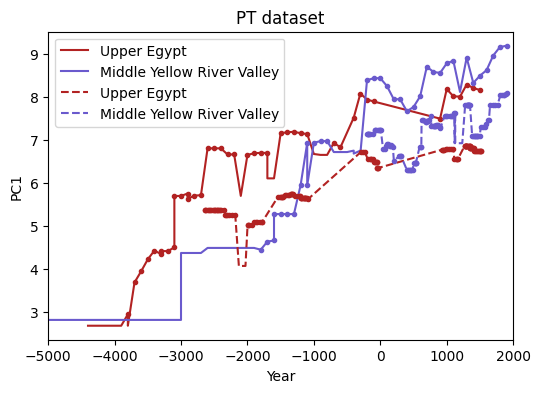

In [55]:
ngas = ['Upper Egypt','Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'PC_1'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = nga, color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('100 year dataset')
plt.xlim(-5000,2000)
plt.legend()


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    plt.plot(dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = nga, color = color)
    plt.plot(dataset_PT.scv_clean.loc[dataset_PT.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_PT.scv_clean.loc[dataset_PT.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('PT dataset')
plt.xlim(-5000,2000)

(-5000.0, 2000.0)

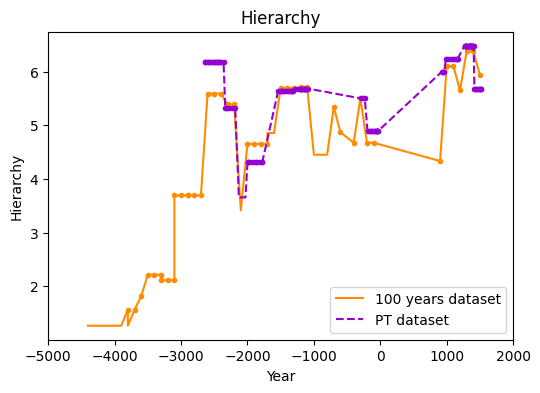

In [56]:
ngas = ['Upper Egypt'] #,'Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'Hierarchy'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    # color = colors[ngas.index(nga)]
    color = 'darkorange'
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = '100 years dataset', color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel(variable)
plt.title(variable)
plt.xlim(-5000,2000)


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkviolet'
    plt.plot(dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_PT.scv_imputed.loc[dataset_PT.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = 'PT dataset', color = color)
    plt.plot(dataset_PT.scv_clean.loc[dataset_PT.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_PT.scv_clean.loc[dataset_PT.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel(variable)

plt.xlim(-5000,2000)


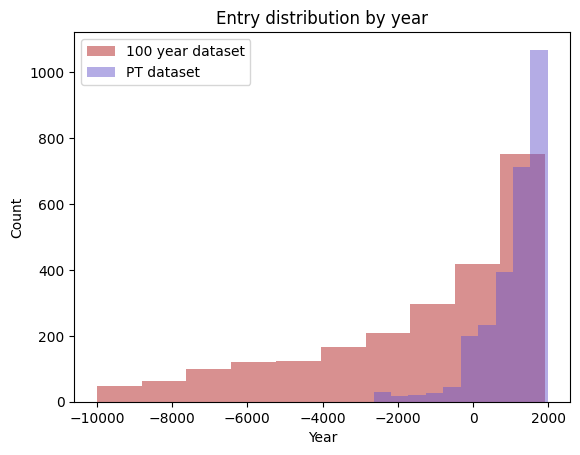

In [57]:
plt.hist(dataset_100yr.scv.Year, color = 'firebrick', alpha = 0.5, label = '100 year dataset')
plt.hist(dataset_PT.scv.Year, color='slateblue', alpha = 0.5, label = 'PT dataset')

plt.legend()
plt.xlabel('Year')
plt.ylabel('Count')

plt.title('Entry distribution by year')
plt.show()

In [58]:
import pandas as pd
import pyreadr
from src.utils import download_data
data = pyreadr.read_r("/Users/mperuzzo/Documents/PT_analysis/fromJim2/sql_data_13may24_TableDat_5n_100yrs.Rdata")
polity_df = download_data("https://seshatdata.com/api/core/polities/?page_size=100")
R_data = data['raw.cc.mean']
R_data_imp = data['imp.cc.mean']

Downloaded 839 rows


In [59]:
R_data['NGA'] = R_data.PolityID.apply(lambda x: polity_df.loc[polity_df['new_name'] == x].iloc[0]['home_nga_name'] if len(polity_df.loc[polity_df['new_name'] == x]) > 0 else x)

In [60]:

R_data = R_data.rename(columns={'PolityID':'PolityName',
                                'NGA.Time':'Year',
                                'Hier' : 'Hierarchy',
                                'Gov' : 'Government',
                                'Infra' : 'Infrastructure',
                                "Info" : "Information"
                                })

sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
all_cols = ['PolityName','Year','NGA']+sc_columns

In [61]:
dataset_R = TSD(categories=['sc'], template_path="/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv")
dataset_R.initialize_dataset_grid(-10000,2000,100)
dataset_R.scv = R_data[all_cols]

Loaded template from /Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/datasets/test.csv
Downloaded 839 rows


In [62]:
dataset_R.impute_missing_values()
dataset_R.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 78.91%
PC2: 5.14%
PC3: 4.67%
PC4: 3.66%
PC5: 3.32%
PC6: 1.68%
PC7: 1.54%
PC8: 1.08%


PCA(n_components=8)

In [63]:
dataset_R.save_dataset(path = '../datasets', name = 'R_data_with_PCA')

dataset_R2 = TSD(file_path='../datasets/R_data_with_PCA.xlsx')

Dataset saved to ../datasets/R_data_with_PCA.xlsx
Dataset loaded from ../datasets/R_data_with_PCA.xlsx


In [64]:
R_data_imp['NGA'] = R_data_imp.PolityID.apply(lambda x: polity_df.loc[polity_df['new_name'] == x].iloc[0]['home_nga_name'] if len(polity_df.loc[polity_df['new_name'] == x]) > 0 else x)

R_data_imp = R_data_imp.rename(columns={'PolityID':'PolityName',
                                'NGA.Time':'Year',
                                'Hier' : 'Hierarchy',
                                'Gov' : 'Government',
                                'Infra' : 'Infrastructure',
                                "Info" : "Information"
                                })

sc_columns = ['Pop','Cap','Terr','Hierarchy', 'Government', 'Infrastructure', 'Information', 'Money']
all_cols = ['PolityName','Year','NGA']+sc_columns

dataset_R2.scv_imputed = R_data_imp[all_cols]

In [65]:
dataset_R2.compute_PCA(sc_columns, 'PC', n_cols = 2, n_PCA = 8)

Explained variance by each PC:
PC1: 80.37%
PC2: 5.82%
PC3: 3.88%
PC4: 3.52%
PC5: 3.31%
PC6: 1.58%
PC7: 1.22%
PC8: 0.29%


/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/src/TimeSeriesDataset.py:318: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.scv_imputed[f"{col_name}_{col+1}"] = pca.transform(df_scaled)[:,col]
/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/src/TimeSeriesDataset.py:318: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.scv_imputed[f"{col_name}_{col+1}"] = pca.transform(df_scaled)[:,col]
/Users/mperuzzo/Documents/repos/SeshatDatasetAnalysis/src/TimeSeriesDataset.py:323: SettingWithCopyWarni

PCA(n_components=8)

In [66]:
dataset_R.scv_imputed

,PolityName,Year,NGA,Pop,Cap,Terr,Hierarchy,Government,Infrastructure,Information,Money,PC_1,PC_2
0,af_durrani_emp,1800.0,Kachi Plain,5.747550,4.210763,6.252853,3.25,0.363636,0.333333,0.733333,6.0,6.157882,3.650492
1,af_ghur_principality,1100.0,Kachi Plain,5.292544,3.082662,5.152570,1.00,0.454545,0.250000,0.866667,5.0,5.155470,1.279910
2,af_ghur_principality,1200.0,Kachi Plain,6.172213,4.145434,6.204120,2.75,0.818182,0.333333,0.866667,5.0,6.580871,2.343726
3,af_greco_bactrian_k,-200.0,Sogdiana,6.176091,4.397940,5.778151,3.50,0.545455,0.500000,0.800000,5.0,6.489057,3.380086
4,af_hephthalite_emp,500.0,Sogdiana,7.423246,4.330278,6.439333,2.75,0.400000,0.416667,0.866667,5.0,6.625731,3.427550
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2227,zi_toutswe,800.0,NaN,3.778151,3.000000,4.000000,3.00,0.000000,0.000000,0.000000,2.0,2.900284,5.898922
2228,zi_toutswe,900.0,NaN,3.778151,3.000000,4.000000,3.00,0.000000,0.000000,0.000000,2.0,2.900284,5.898922
2229,zi_toutswe,1000.0,NaN,3.778151,3.000000,4.000000,3.00,0.000000,0.000000,0.000000,2.0,2.900284,5.898922
2230,zi_toutswe,1100.0,NaN,3.778151,3.000000,4.000000,3.00,0.000000,0.000000,0.000000,2.0,2.900284,5.898922


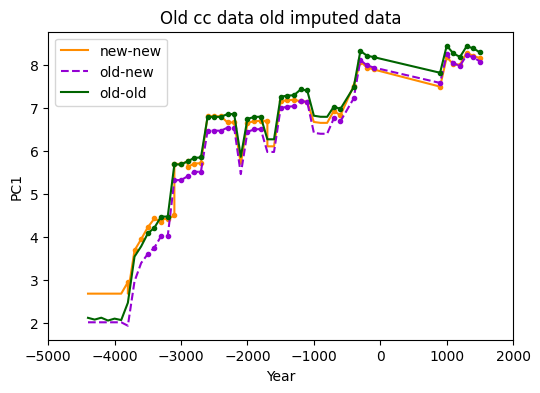

In [67]:
ngas = ['Upper Egypt'] #,'Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'PC_1'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    # color = colors[ngas.index(nga)]
    color = 'darkorange'
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = 'new-new', color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('New cc data new analysis')
plt.xlim(-5000,2000)


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkviolet'
    plt.plot(dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = 'old-new', color = color)
    plt.plot(dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('Old cc data new analysis')
plt.xlim(-5000,2000)

# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkgreen'
    plt.plot(dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = 'old-old', color = color)
    plt.plot(dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel('PC1')
plt.title('Old cc data old imputed data')
plt.xlim(-5000,2000)
plt.show()

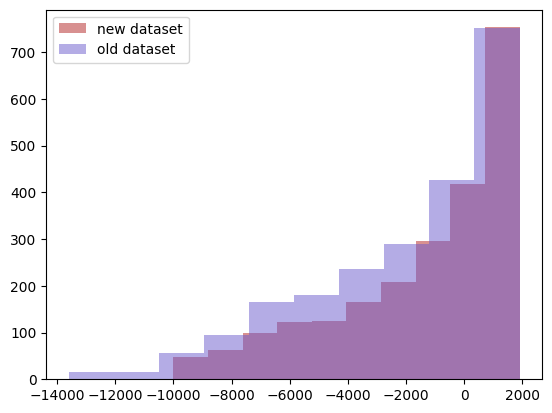

In [70]:
plt.hist(dataset_100yr.scv_imputed.Year, color = 'firebrick', alpha = 0.5, label = 'new dataset')
plt.hist(dataset_R.scv_imputed.Year, color='slateblue', alpha = 0.5, label = 'old dataset')
plt.legend()

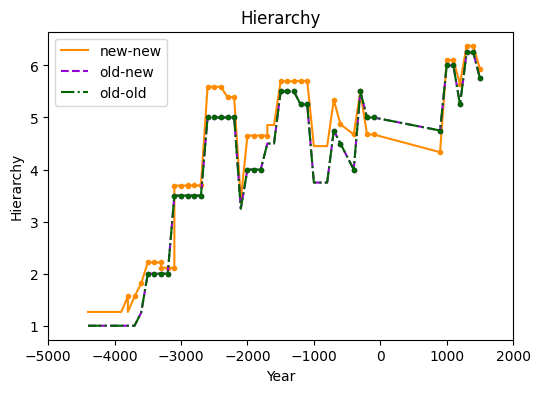

In [72]:
ngas = ['Upper Egypt'] #,'Middle Yellow River Valley']
colors  = ['firebrick', 'slateblue']
variable = 'Hierarchy'

fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    # color = colors[ngas.index(nga)]
    color = 'darkorange'
    plt.plot(dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_imputed.loc[dataset_100yr.scv_imputed.NGA == nga].sort_values(by='Year')[variable], label = 'new-new', color = color)
    plt.plot(dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_100yr.scv_clean.loc[dataset_100yr.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)

plt.xlabel('Year')
plt.ylabel(variable)
plt.title('New cc data new analysis')
plt.xlim(-5000,2000)


# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkviolet'
    plt.plot(dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_imputed.loc[dataset_R.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'--', label = 'old-new', color = color)
    plt.plot(dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R.scv_clean.loc[dataset_R.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel(variable)
plt.title('Old cc data new analysis')
plt.xlim(-5000,2000)



# fig, ax = plt.subplots(figsize=(6, 4))
for nga in ngas:
    color = colors[ngas.index(nga)]
    color = 'darkgreen'
    plt.plot(dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_imputed.loc[dataset_R2.scv_imputed.NGA == nga].sort_values(by='Year')[variable],'-.', label = 'old-old', color = color)
    plt.plot(dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year').Year,dataset_R2.scv_clean.loc[dataset_R2.scv_clean.NGA == nga].sort_values(by='Year')[variable],'o', markersize=3, color = color)
plt.legend()
plt.xlabel('Year')
plt.ylabel(variable)
plt.title(variable)
plt.xlim(-5000,2000)
plt.show()

In [49]:
raw_dat = data["datawide.mean"]
name_mapping = {}
for col in raw_dat.columns:
    new_name = col.replace('.', '-')
    name_mapping[col] = new_name.lower()

# rename the columns to make them match between datasets
raw_dat = raw_dat.rename(columns=name_mapping)
raw_dat.nga = raw_dat.nga.apply(lambda x: x[4:])
raw_dat = raw_dat.rename(columns={'nga': 'PolityName', 
                                  'nga-time': 'Year', 
                                  'polity-population':'polity-populations', 
                                  'polity-territory':'polity-territories', 
                                  'population-of-the-largest-settlement':'population-of-the-largest-settlements',
                                  'settlement-hierarchy':'settlement-hierarchies',
                                  'professional-priesthood':'professional-priesthoods',
                                  'examination-system':'examination-systems',
                                  'formal-legal-code':'formal-legal-codes',
                                  'merit-promotion':'merit-promotions',
                                  'drinking-water-supply-systems':'drinking-water-supplies',
                                  'general-postal-service':'general-postal-services',
                                  'script':'scripts',
                                  'phonetic-alphabetic-writing':'phonetic-alphabetic-writings',
                                  'non-phonetic-alphabetic-writing':'non-phonetic-writings',
                                  'calendar':'calendars',
                                  'scientific-literature':'scientific-literatures',
                                  'history':'histories',
                                  'religious-literature':'religious-literatures',
                                  'fiction':'fictions',
                                  'practical-literature':'practical-literatures',
                                  'philosophy':'philosophies',
                                  'paper-currency':'paper-currencies'})


# find a list of common columns
common_columns = list(set(raw_dat.columns).intersection(set(dataset_100yr.raw.columns)))

# find a list of columns that are in the social complexity dataset 
from src.mappings import social_complexity_mapping
sc_raw_cols = []
for key, dic in social_complexity_mapping.items():
    sc_raw_cols.extend(dic.keys())

common_columns = ["PolityName","Year"] + (list(set(common_columns).intersection(set(sc_raw_cols))))

# create a dataframe with the common columns and a column to indicate the source of the data
df1 = raw_dat[common_columns]
df1['data'] = 'old'
df2 = dataset_100yr.raw[common_columns]
df2['data'] = 'new'
df_merged = pd.concat([df1, df2])


/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_28174/1920552928.py:48: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['data'] = 'old'
/var/folders/c3/82t48qlj2bg0xttc4k7vx70r0000gq/T/ipykernel_28174/1920552928.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['data'] = 'new'


In [50]:
from src.Template import Template
template = Template(categories = ['sc'], file_path= '../datasets/MSP_template.csv')

Loaded template from ../datasets/MSP_template.csv


In [51]:
col = 'polity-territories'
for pol in df1.PolityName.unique():
    for year in df1.loc[df1.PolityName == pol].Year.unique():
        value = df1.loc[(df1.PolityName == pol)&(df1.Year == year), col].iloc[0]
        entry = template.template.loc[template.template['PolityName'] == pol, col]
        if len(entry) == 0:
            print(f'polity {pol} missing in template')
            continue
        else:
            entry = entry.iloc[0]
        if pd.isna(entry) and pd.isna(value):
            continue
        elif pd.isna(entry) and pd.notna(value):
            print(f'polity {pol} year {year} value {value} missing in template')
            continue
        elif pd.notna(entry) and pd.isna(value):
            # print(f'polity {pol} year {year} value missing in data')
            continue
        else:
            val_dict = eval(entry)
            
            if (template.is_in_range(val_dict, year, value)):
                continue
            else:
                print(f'polity {pol} year {year} value {value} \nnot in range {val_dict["value"]}, expected {template.sample_dict(val_dict, year)}')

polity ir_ak_koynlu missing in template
polity ir_ak_koynlu missing in template
polity gb_british_emp_2 year 1900.0 value 30800000.0 missing in template
polity in_gurjar missing in template
polity in_gurjar missing in template
Error: The year -1700.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -1600.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -1500.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -1400.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -1300.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -1200.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -1100.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -1000.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -900.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -800.0 is outside the polity years [-2100.0, -1800.0]
Error: The year -700.0 is outside the polity years [-2100.0, -180

In [21]:
template.template.loc[template.template['PolityName'] == 'ir_seleucid_emp', col].iloc[0]

"{'t': [[-312, -201, -200, -147]], 'value': [[(3600000, 3600000), (3600000, 3600000), (2300000, 475000), (2300000, 475000)]], 'polity_years': [-312.0, -63.0]}"